# Módulo 2: Preprocesamiento

## Expresiones regulares


### Actividad 1: En clase
* Analizar información categórica. 
* Tomar las variables `beneficiarios_alimentos_dif_2014` y `observacion_mobiliario`. Analizarlas y extraer información usando expresiones regulares. 

### Actividad 2: De tarea

* Tomar las variables:
    * `conectividad`.
    * `observacion_pec2013`.
    * `observacion_pec2014`.
* Analizar **cuidadosamente** los patrones que se pueden obtener. 
    * Cuida que los patrones sean **todos** los posibles dentro de lo razonable, es decir, **información útil para diferenciar** a un centro educativo. Años, direcciones o cosas por el estilo no entran en esto.
* Generar columnas nuevas con los patrones obtenidos del punto anterior. 

**Requerimiento especial: Instalar `unidecode`**

## Expresiones regulares

Las expresiones regulares son indicaciones con las que podemos extraer texto de cadenas basado en patrones. Tienen comandos específicos, nosotros las usaremos a través de la paquetería `re`. 

Si quieres obtener más información sobre los comandos utilizados u otros _hacks_ que puedes lograr usando esta herramienta, te recomiendo revisar: https://regexone.com/references/python.

In [1]:
import pandas as pd
import re
import unidecode
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('cleaned_inversiones_26.csv',
                 index_col=0)

In [3]:
df.head()

,municipio,clave_ct,responsable,turno,nombre_ct,director,nivel,matricula,docente,grupos,...,inversion_programa_sana_2014,inversion_programa_coniba_2015,inversion_escuelas_de_tiempo_completo_2015_(recurso_2014),inversion_programa_escuela_digna_2015,inversion_faeb_2015,inversion_fonden_2015,inversion_infraestructura_educativa_estatal_2015_(recurso_2013),inversion_programa_escuelas_de_excelencia_2015_(recurso_2014),inversion_programa_sana_2015,otros_programas
inmueble,,,,,,,,,,,,,,,,,,,,,
1406848K,AHUALULCO DE MERCADO,14DPR0273Q,R,MATUTINO,5 DE MAYO,ANGELICA IVETT FLORES CARDENAS,PRIMARIA,329,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406850C,AHUALULCO DE MERCADO,14EPR0482V,R,MATUTINO,VALENTIN GOMEZ FARIAS,MARIA EDITH CRUZ CASTAÃEDA,PRIMARIA,94,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406852K,AHUALULCO DE MERCADO,14EJN0200G,R,MATUTINO,EMILIANO ZAPATA,HILDA GARCIA VEGA,PREESCOLAR,144,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406854H,AHUALULCO DE MERCADO,14DJN0155L,R,MATUTINO,JAVIER URIBE,MARIA ELENA ARELLANO NUÃEZ,PREESCOLAR,111,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406855A,AHUALULCO DE MERCADO,14EPR0014B,R,MATUTINO,JOSE MA MERCADO,MARIA CONSEPCION PINZON RODRIGUEZ,PRIMARIA,289,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(9489, 54)

Podemos observar que hay un número aceptable de filas y además bastantes columnas, son tantas que ni siquiera se alcanzan a ver todas. 

Concentrémonos en las variables categóricas y de texto. 

In [5]:
df.describe(include=['object'])

C:\Users\TAJ\AppData\Local\Temp\ipykernel_23720\3011300674.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include=['object'])


,municipio,clave_ct,responsable,turno,nombre_ct,director,nivel,beneficiarios_alimentos_dif_2014,aulas_interactivas_observacion,aulas_provisionales_observacion,conectividad,observacion_pec2013,observacion_pec2014,observacion_mobiliario
count,9489,9489,9489,9489,9489,9489,9489,4329,525,999,6277,1986,2350,2802
unique,125,9191,2,5,2143,8274,3,334,39,266,186,496,597,1739
top,GUADALAJARA,14DES0008L,R,MATUTINO,BENITO JUAREZ,MA. CONCEPCION CAMPOS PERALTA,PRIMARIA,BENEFICIARIOS = 10 / ALIMENTO CALIENTE,ESTADO = INSTALADO / AULAS INTERACTIVAS = 3,TOTAL DE AULAS = 1/ POR SUSTITUIR USO EDUC = 1...,eJALISCO = 2 MB INSTALADO /,PEC XIII (2013 -2014) / APOYO TÃCNICO PEDAGÃ...,PEC XIV (2014 - 2015) / APOYO TÃCNICO PEDAGÃ...,PIEZAS = 19 ALUMNOS =12 MATRICULA = 12
freq,940,2,7311,7010,319,12,4957,153,83,187,1900,19,25,27


Vemos que hay diferentes cadenas de texto y eso que no estamos viendo el _big picture_ y solo vemos la moda. 


Dada la alta granularidad y el hecho de que son _ids_, descalificaremos desde un inicio _inmueble_ y _clave-ct_. 


Hagamos un análisis un poco más profundo. 

Tomemos una variable sencilla y entendamos qué es lo que hay dentro: `turno`.

In [6]:
df['turno'].value_counts()

turno
MATUTINO       7010
VESPERTINO     2407
NOCTURNO         50
MIXTO            15
DISCONTINUO       7
Name: count, dtype: int64

Hay pocos valores únicos, ¿hay valores nulos? 

In [7]:
df.turno.isnull().mean()

np.float64(0.0)

No hay nulos. ¿Cómo se ven nuestros valores?

<Axes: >

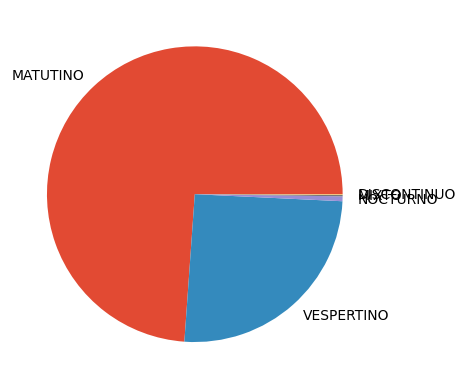

In [8]:
df.turno.value_counts().plot(kind='pie')

En esta variable no parece que haya alguna peculiaridad interesante. 
¿Qué pasa si vemos la de beneficiarios de alimentos? 



<Axes: >

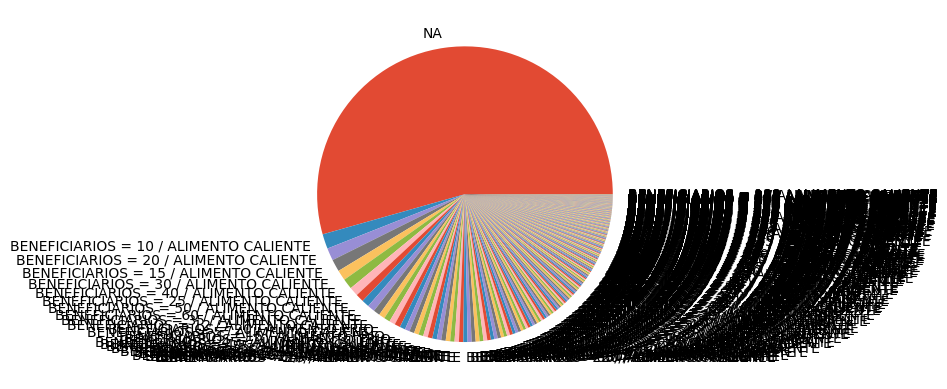

In [9]:
df['beneficiarios_alimentos_dif_2014'].fillna('NA').value_counts().plot(kind='pie')

Es un **desastre mayúsculo** pues hay demasiados valores únicos, 334 para ser exactos. Y la mayoría son nulos. 


Cambiemos el enfoque y generemos estas gráficas:

* Variables con baja granularidad grafiquemos un pay. 
* Variables con alta granularidad grafiquemos un pay con aquellos que tienen mayor incidencia de aparición. 

In [10]:
# Copia del frame
copy = df.select_dtypes(
    include=['object']
).copy()

# Llenado de nulos temporalmente
copy.fillna('NA', inplace=True)

C:\Users\TAJ\AppData\Local\Temp\ipykernel_23720\1800820176.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  copy = df.select_dtypes(


,municipio,clave_ct,responsable,turno,nombre_ct,director,nivel,beneficiarios_alimentos_dif_2014,aulas_interactivas_observacion,aulas_provisionales_observacion,conectividad,observacion_pec2013,observacion_pec2014,observacion_mobiliario
inmueble,,,,,,,,,,,,,,
1406848K,AHUALULCO DE MERCADO,14DPR0273Q,R,MATUTINO,5 DE MAYO,ANGELICA IVETT FLORES CARDENAS,PRIMARIA,BENEFICIARIOS = 60 / ALIMENTO CALIENTE,NA,NA,eJALISCO = 2 MB INSTALADO /,NA,NA,PIEZAS = 569 ALUMNOS =304 MATRICULA = 304
1406850C,AHUALULCO DE MERCADO,14EPR0482V,R,MATUTINO,VALENTIN GOMEZ FARIAS,MARIA EDITH CRUZ CASTAÃEDA,PRIMARIA,BENEFICIARIOS = 30 / ALIMENTO CALIENTE,NA,NA,eJALISCO = 2 MB INSTALADO /INTERNET PARTICULAR /,PEC XIII (2013 -2014) / APOYO TÃCNICO PEDAGÃ...,NA,PIEZAS = 179 ALUMNOS =93 MATRICULA = 93
1406852K,AHUALULCO DE MERCADO,14EJN0200G,R,MATUTINO,EMILIANO ZAPATA,HILDA GARCIA VEGA,PREESCOLAR,BENEFICIARIOS = 20 / ALIMENTO FRIO,NA,NA,eJALISCO = 2 MB INSTALADO /INTERNET PARTICULAR /,PEC XIII (2013 -2014) / APOYO TÃCNICO PEDAGÃ...,NA,PIEZAS = 204 ALUMNOS =142 MATRICULA = 142
1406854H,AHUALULCO DE MERCADO,14DJN0155L,R,MATUTINO,JAVIER URIBE,MARIA ELENA ARELLANO NUÃEZ,PREESCOLAR,BENEFICIARIOS = 60 / ALIMENTO CALIENTE,NA,NA,eJALISCO = 2 MB INSTALADO /,NA,NA,PIEZAS = 168 ALUMNOS =117 MATRICULA = 117
1406855A,AHUALULCO DE MERCADO,14EPR0014B,R,MATUTINO,JOSE MA MERCADO,MARIA CONSEPCION PINZON RODRIGUEZ,PRIMARIA,BENEFICIARIOS = 40 / ALIMENTO CALIENTE,NA,NA,eJALISCO = 2 MB INSTALADO /INTERNET PARTICULAR /,NA,PEC XIV (2014 - 2015) / APOYO TÃCNICO PEDAGÃ...,PIEZAS = 518 ALUMNOS =276 MATRICULA = 344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413374C,TONALA,14DJN2279H,L,VESPERTINO,JORGE WILMONT MASON,CECILIA FIGUEROA HERNANDEZ,PREESCOLAR,NA,NA,NA,NA,NA,NA,NA
1413375G,TONALA,14EES0086O,R,MATUTINO,HERMINIO LARIOS,JUAN CRUZ LOPEZ BASTIDAS,SECUNDARIA,NA,NA,NA,NA,NA,NA,NA
1413376K,TONALA,14DPR4197B,R,MATUTINO,JUAN SORIANO,PEDRO FABIAN AGUIRRE AGUIRRE,PRIMARIA,BENEFICIARIOS = 50 / ALIMENTO FRIO,NA,NA,NA,NA,NA,NA


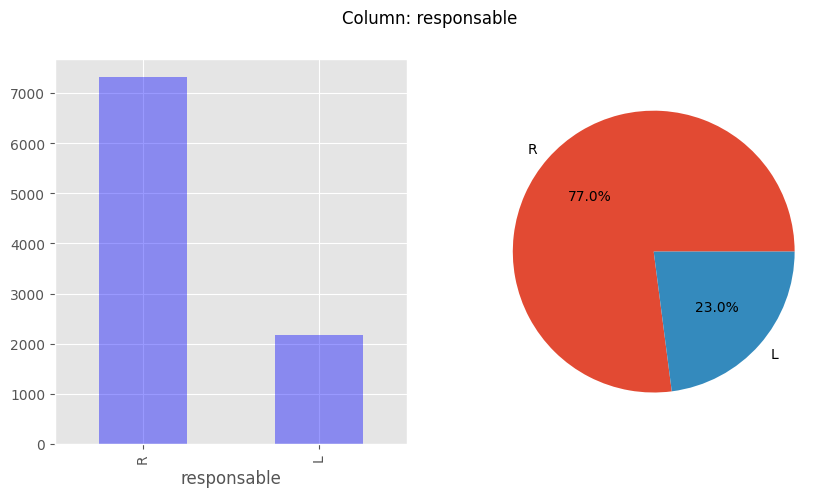

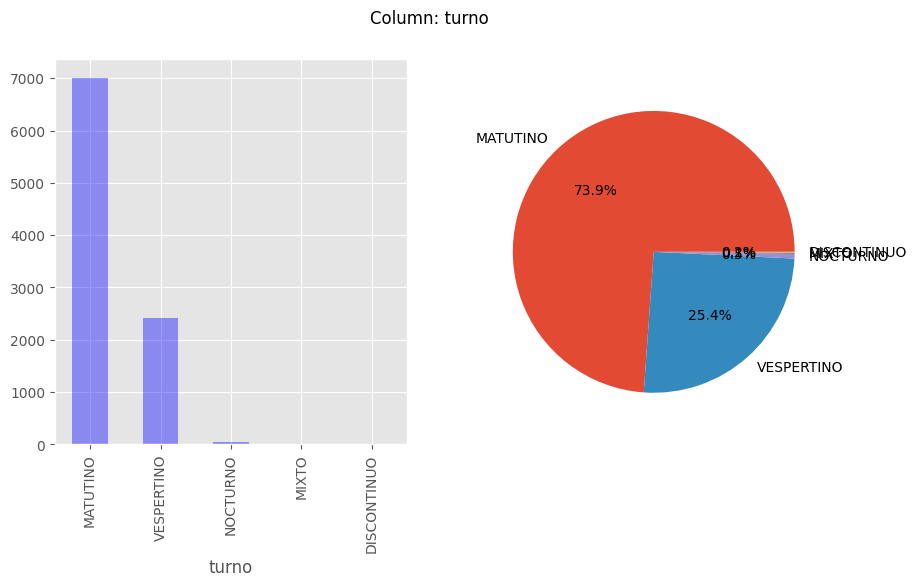

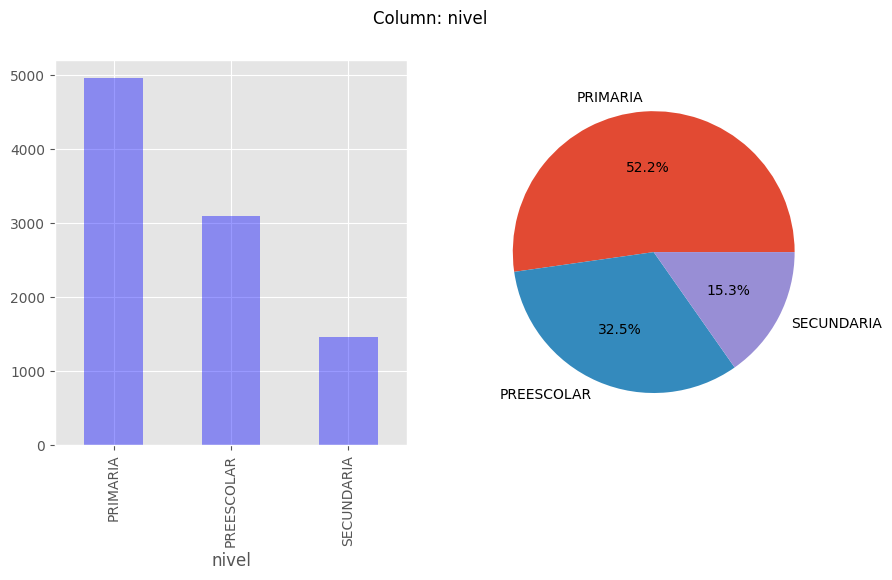

In [11]:
threshold = 10

seen_variables = []

for column in copy:
    value_counts = copy[column].value_counts()

    if len(value_counts) <= threshold:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

        value_counts.plot(kind='bar', ax=ax1, alpha=0.4, color='blue')
        value_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')

        seen_variables.append(column)
        fig.suptitle(f'Column: {column}')

Hay pocas variables que parece requieren poco (o nulo) tratamiento y de baja granularidad. 

Como casi siempre, el trabajo estará en las de mucha granularidad. 

Veamos algún ejemplo de las variables que caen en este caso.

In [12]:
missing = set(copy.columns.tolist()).difference(seen_variables)
missing = list(missing)
missing

['director',
 'observacion_mobiliario',
 'nombre_ct',
 'aulas_interactivas_observacion',
 'observacion_pec2014',
 'clave_ct',
 'aulas_provisionales_observacion',
 'beneficiarios_alimentos_dif_2014',
 'municipio',
 'conectividad',
 'observacion_pec2013']

In [13]:
copy['municipio'].value_counts()

municipio
GUADALAJARA                940
ZAPOPAN                    768
SAN PEDRO TLAQUEPAQUE      384
TLAJOMULCO DE ZUÃIGA      362
TONALA                     352
                          ... 
CUAUTLA                     12
LA MANZANILLA DE LA PAZ     12
TECHALUTA DE MONTENEGRO     12
SAN MARCOS                   8
EJUTLA                       8
Name: count, Length: 125, dtype: int64

In [15]:
set(df['municipio'].apply(lambda x: unidecode.unidecode(x)).tolist())

{'ACATIC',
 'ACATLAN DE JUAREZ',
 'AHUALULCO DE MERCADO',
 'AMACUECA',
 'AMATITAN',
 'AMECA',
 'ARANDAS',
 'ATEMAJAC DE BRIZUELA',
 'ATENGO',
 'ATENGUILLO',
 'ATOTONILCO EL ALTO',
 'ATOYAC',
 'AUTLAN DE NAVARRO',
 'AYOTLAN',
 'AYUTLA',
 'BOLAAOS',
 'CAAADAS DE OBREGON',
 'CABO CORRIENTES',
 'CASIMIRO CASTILLO',
 'CHAPALA',
 'CHIMALTITAN',
 'CHIQUILISTLAN',
 'CIHUATLAN',
 'COCULA',
 'COLOTLAN',
 'CONCEPCION DE BUENOS AIRES',
 'CUAUTITLAN DE GARCIA BARRAGAN',
 'CUAUTLA',
 'CUQUIO',
 'DEGOLLADO',
 'EJUTLA',
 'EL ARENAL',
 'EL GRULLO',
 'EL LIMON',
 'EL SALTO',
 'ENCARNACION DE DIAZ',
 'ETZATLAN',
 'GOMEZ FARIAS',
 'GUACHINANGO',
 'GUADALAJARA',
 'HOSTOTIPAQUILLO',
 'HUEJUCAR',
 'HUEJUQUILLA EL ALTO',
 'IXTLAHUACAN DE LOS MEMBRILLOS',
 'IXTLAHUACAN DEL RIO',
 'JALOSTOTITLAN',
 'JAMAY',
 'JESUS MARIA',
 'JILOTLAN DE LOS DOLORES',
 'JOCOTEPEC',
 'JUANACATLAN',
 'JUCHITLAN',
 'LA BARCA',
 'LA HUERTA',
 'LA MANZANILLA DE LA PAZ',
 'LAGOS DE MORENO',
 'MAGDALENA',
 'MASCOTA',
 'MAZAMITLA',
 'ME

Se observa entonces que hay espacios y caracteres especiales que deberán ser normalizados.

La idea de normalizar los strings es que puede haber casos como el siguiente:

* `'Raúl Romero'`.
* `'Raul Romero'`.

Ambos strings dicen y dan a entender lo mismo pero son diferentes, lo mismo ocurrirá si hay espacios o cosas por el estilo. 

Generalicemos este procedimiento creando una función que nos permita estandarizar texto. 

In [16]:
def text_treatment(text):
    """Basic text treatment function
    
    Parameters
    ----------
    text: str
        String to be normalized.

    Returns
    -------
    new_text: str
        Normalized text. 
        No extra spaces, normal spaces turned to underscores 
        and no accents.
    
    """
    new_text = unidecode.unidecode(text.strip().replace(' ','_'))
    

    return new_text


In [17]:
# Aplicando código
for column in copy:
    copy['column'] =  copy['column'].apply(text_treatment)

KeyError: 'column'

Comparemos cambios que hayan existido entre las variables normalizadas y las variables originales.

El resultado es igual. 
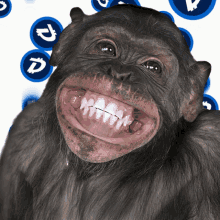

De antemano era muy poco manejable ver todas los valores de todas las columnas, así que aunque el procedimiento haya sido "en vano" para este caso particular, es importante buscar estandarizar textos para no perder información o asumir que una información es diferente a otra solo por _typos_. 


#### Análisis de información "oculta"

Observamos que hay ciertas columnas con información "oculta", como:

* `beneficiarios_alimentos_dif_2014`.
* `conectividad	`.
* `observacion_pec2013`.
* `observacion_pec2014`.
* `observacion_mobiliario`. 

Antes de empezar a extraer posible información, veamos algunas de las variables que aparentan tener solo `None`. 

Se observa que, así como en las variables anteriormente mencionadas tenemos un área de oportunidad de información embebida en texto. 

In [37]:
variables = ['aulas_interactivas_observacion',
             'aulas_provisionales_observacion',
             'beneficiarios_alimentos_dif_2014',
             'conectividad',
             'observacion_pec2013',
             'observacion_pec2014',
             'observacion_mobiliario'
            ]

#### RegEx

Las expresiones regulares son una de las herramientas que nos ayudarán a extraer texto.

Son cadenas de texto que a su vez dan indicaciones para poder extraer información específica según sea el caso que nos interese. 


Suponga el siguiente ejemplo:

cadena = `'Hola, soy Raúl y tengo 26 años'`

Si usted busca extraer la edad de la persona, la respuesta sería el siguiente código: 

```
regex = r'\d+'
result = re.findall(regex, cadena)

```

Con el siguiente output: 

```
['26']
```

Veamos: 

In [4]:
cadena = 'Hola, soy Raúl y tengo 26 años'


Vemos varios componentes aquí: 
* `cadena`. Esto es simplemente un string sobre el cual buscaremos patrón. 
* `regex`. Es una variable con una expresión regular. Las expresiones regulares se caracterian por tener una `r` antes de la primer comilla. En realidad no hay problema si no se agrega pero puede ayudar sobre todo cuando hay espacios o cosas por el estilo. 
* `re`. Paquetería que nos permite implementar regex. 
* `findall`. Es una de las muchas implementaciones, ésta nos permite buscar todos los elementos. 



Apliquemos el caso a algunas de las columnas que tenemos. 


#### Beneficiarios alimentos DIF 2014


In [94]:
variable = 'beneficiarios_alimentos_dif_2014'

¿Qué tenemos en común? 

* Cantidad de beneficiarios. 
* Tipo de alimento.


##### Primer caso: 

In [96]:
# String de ejemplo
string = 'BENEFICIARIOS_=_50_/_ALIMENTO_FRIO'

Componentes:
* `\d`: Extrae dígitos. 
* `+`: Uno o más ocurrencias.



In [5]:
# Convirtiendo a número:


##### Segundo caso: 

Componentes:
* `()`: El uso de paréntesis extrae subgrupos. 
* `|`: Operador lógico `OR`. 



Teniendo esto en mente podemos aplicar la función y tener **dos nuevos _features_**.

Observamos un detalle, los datos con `NA` los hizo transformó en cero porque no hay coincidencia, entonces es una lista vacía que evidentemente suma cero. 

Esto no es del todo correcto, corrijamos pero ahora de una manera más entendible. 

In [104]:
def regex_beneficiarios(string, na_string='NA'):

    return sum([int(c) for c in re.findall(regex, string)])

#### Observación mobiliario

In [107]:
variable = 'observacion_mobiliario'

Hay 3 componentes principales:
* Piezas.
* Alumnos (que por alguna razón son considerados "mobiliario" wtf). 
* Matrícula. 

In [109]:
string = 'PIEZAS_=_569_ALUMNOS_=304_MATRICULA_=_604'

Si le lanzamos un `d+` nos va a traer los 3 y nos arriesgamos a que vengan en desorden los textos. 

In [1]:
texto_especial = 'MATRICULA'



Componentes:
* `\D`: Extrae todo caracter que **no** es un número. 
* `()`: El uso de paréntesis extrae subgrupos. 
* `+`: Uno o más ocurrencias.


Generemos una función. 

In [2]:
special_texts = ['PIEZAS', 'ALUMNOS', 'MATRICULA']




##### Algunos otros hacks útiles en RegEx

* `.`: Cualquier caracter. Útil, pero peligroso porque se puede escapar todo.
* `\s`: Cualquier espacio en blanco. 
* `\S`: Cualquier espacio que no sea blanco. 
* `[a-z]`: Caracteres de la "a" a la "z". 
* `[0-9]`: Caracteres del 0 al 9. 
* `\w`: Cualquier caracter alfanumérico. 
* `\W`: Cualquier caracter no alfanumérico.
* `*`: Cero o más repeticiones. 